In [ ]:
import cv2
import random
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
## img = cv2.imread('E://gitCode/jupyterCode/1.jpg', 1)
img = cv2.imread('1.jpg', 1)
cv2.imshow('plane', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

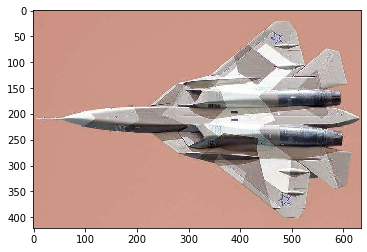

In [3]:
plt.imshow(img)

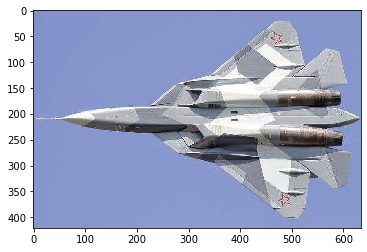

In [84]:
B,G,R = cv2.split(img)
img_rgb = cv2.merge((R,G,B))
plt.imshow(img_rgb)

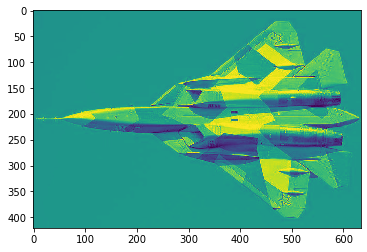

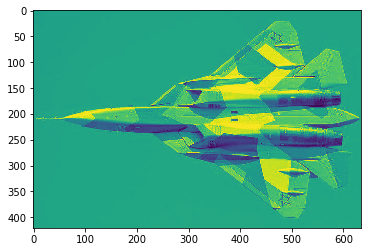

In [6]:
plt.imshow(G)

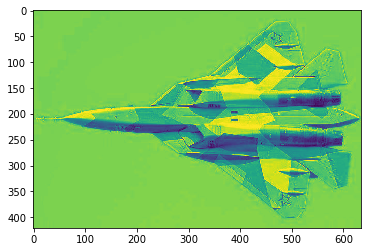

In [7]:
plt.imshow(B)

In [15]:
print(R)

[[129 129 129 ... 134 134 134]
 [129 129 129 ... 134 134 134]
 [129 129 129 ... 134 134 134]
 ...
 [134 134 134 ... 137 137 137]
 [134 134 134 ... 137 137 137]
 [134 134 134 ... 137 137 137]]


In [14]:
print(img)

[[[203 144 129]
  [203 144 129]
  [203 144 129]
  ...
  [204 149 134]
  [204 149 134]
  [204 149 134]]

 [[203 144 129]
  [203 144 129]
  [203 144 129]
  ...
  [204 149 134]
  [204 149 134]
  [204 149 134]]

 [[203 144 129]
  [203 144 129]
  [203 144 129]
  ...
  [204 149 134]
  [204 149 134]
  [204 149 134]]

 ...

 [[204 149 134]
  [204 149 134]
  [204 149 134]
  ...
  [207 152 137]
  [207 152 137]
  [207 152 137]]

 [[204 149 134]
  [204 149 134]
  [204 149 134]
  ...
  [207 152 137]
  [207 152 137]
  [207 152 137]]

 [[204 149 134]
  [204 149 134]
  [204 149 134]
  ...
  [207 152 137]
  [207 152 137]
  [207 152 137]]]


In [10]:
print(img.dtype)

uint8


In [11]:
print(img.shape)

(421, 634, 3)


In [16]:
## plt的使用，缩放
plt.figure(figsize=2,1))
plt.imshow(img,cmap='gray')
plt.show()



SyntaxError: invalid syntax (<ipython-input-16-1cb3cee20b11>, line 2)

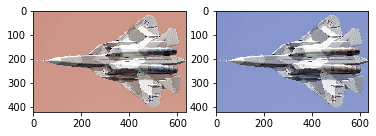

In [17]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
##定义函数
def my_show(img2,size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    plt.show()

In [20]:
my_show(img[150:300][200:300])

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 216x216 with 0 Axes>

In [21]:

B,G,R = cv2.split(img)

In [22]:
B

array([[203, 203, 203, ..., 204, 204, 204],
       [203, 203, 203, ..., 204, 204, 204],
       [203, 203, 203, ..., 204, 204, 204],
       ...,
       [204, 204, 204, ..., 207, 207, 207],
       [204, 204, 204, ..., 207, 207, 207],
       [204, 204, 204, ..., 207, 207, 207]], dtype=uint8)

In [29]:
def img_coolor(img1,b_increase,r_decrease):
    B,G,R = cv2.split(img1)    ## 蓝色
    b_lim = 255 - b_increase 
    B[B > b_lim ] = 255 
    B[B <= b_lim] = (b_increase + B[B <= b_lim]).astype(img1.dtype)
    
    r_lim = r_decrease 
    R[R < r_lim] = 0 
    R[R >= r_lim] = (R[R >= r_lim] - r_decrease ).astype(img1.dtype)
    
    return cv2.merge((B,G,R))

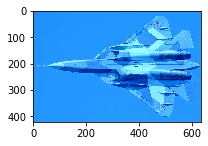

In [31]:
cooler_img = img_coolor(img,100,100)
my_show(cooler_img)

In [40]:
## Gamma Change   越小越亮
def adject_gamma(img1, gamma=1.0):
    invGamma = 1/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0)**invGamma) * 255)
        
    table = np.array(table).astype('uint8')
    return cv2.LUT(img1,table)

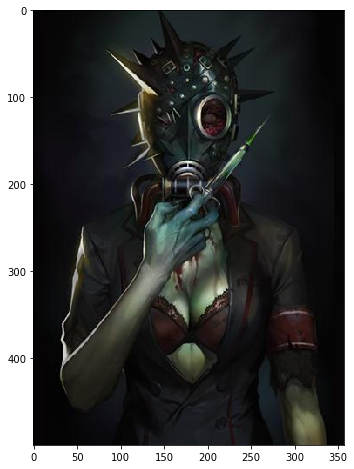

In [34]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size=(8,8))

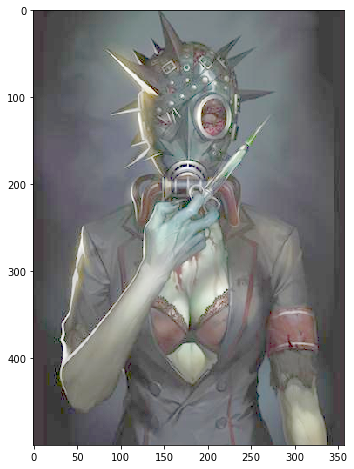

In [42]:
img_bringhter = adject_gamma(img_dark,3)
my_show(img_bringhter,size=(8,8))

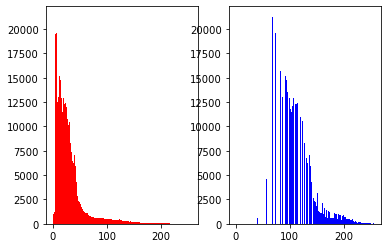

In [46]:
## 直方图均衡
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(122)
plt.hist(img_bringhter.flatten(),256,[0,256],color='b')
plt.show()

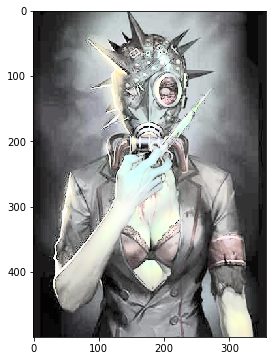

In [49]:
## YUV色彩空间的Y进行直方图均衡  来调亮图片
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   ## 将Y通道进行变换
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
my_show(img_output,size=(6,6))


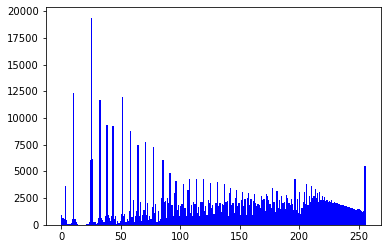

In [52]:
plt.hist(img_output.flatten(),256,[0,256],color='b')
plt.show()

In [59]:
## Perspective   transfrom 变换  

## 投影变换

pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])
pts2 = np.float32([[5,5],[10,480],[470,10],[550,530]])
M = cv2.getPerspectiveTransform(pts1,pts2)

img_warp = cv2.warpPerspective(img,M,(500,500))

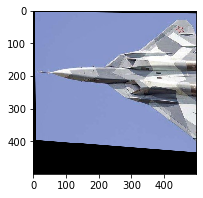

In [70]:
my_show(img_warp)


In [72]:
## 膨胀和腐蚀
img_libai = cv2.imread('lb.png',0)


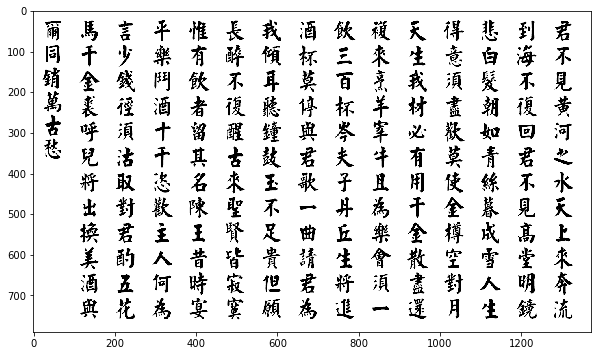

In [75]:
plt.figure(figsize=(10,8))
plt.imshow(img_libai,cmap='gray')
plt.show()

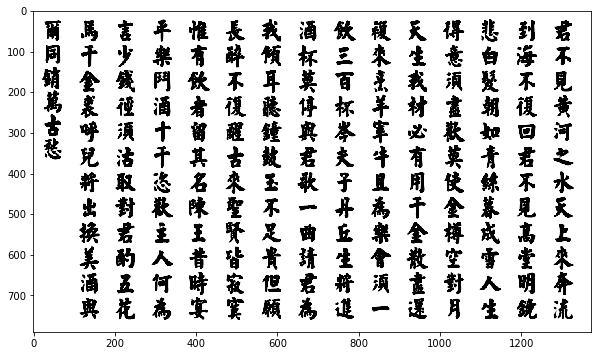

In [77]:
img_erode =   cv2.erode(img_libai,None,iterations= 1)

plt.figure(figsize=(10,8))
plt.imshow(img_erode,cmap='gray')
plt.show()

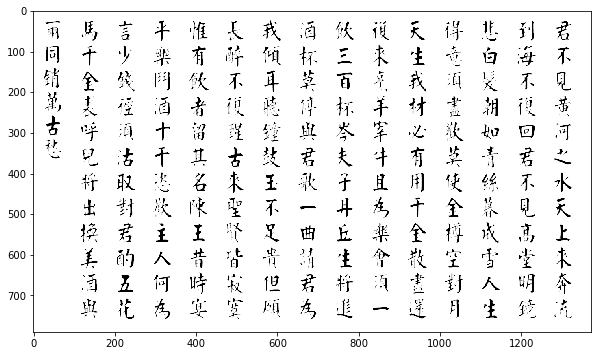

In [78]:
img_dilit =   cv2.dilate(img_libai,None,iterations= 1)

plt.figure(figsize=(10,8))
plt.imshow(img_dilit,cmap='gray')
plt.show()

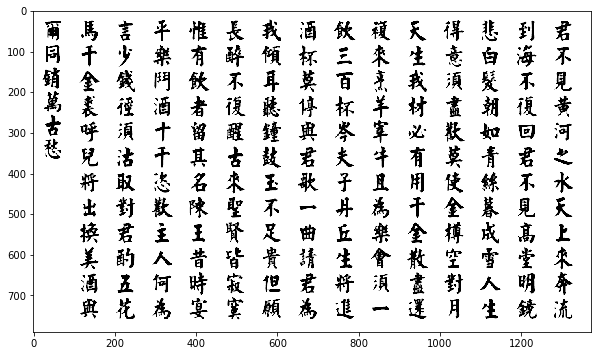

In [80]:
img_dilit =   cv2.dilate(img_erode,None,iterations= 1)

plt.figure(figsize=(10,8))
plt.imshow(img_dilit,cmap='gray')
plt.show()

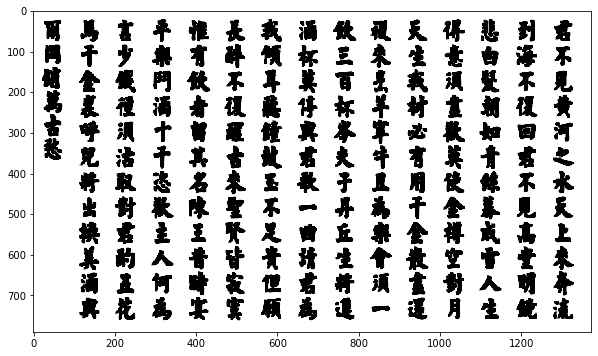

In [82]:
img_erode =   cv2.erode(img_dilit,None,iterations= 2)

plt.figure(figsize=(10,8))
plt.imshow(img_erode,cmap='gray')
plt.show()

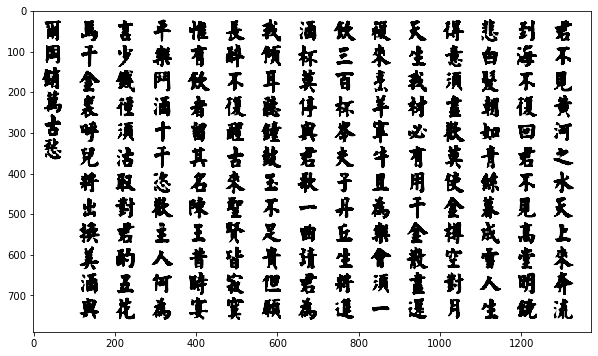

In [83]:
img_dilit =   cv2.dilate(img_erode,None,iterations= 1)

plt.figure(figsize=(10,8))
plt.imshow(img_dilit,cmap='gray')
plt.show()

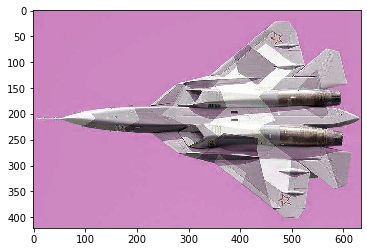

In [96]:
## hsv处理颜色底片变换
hsv_h,hsv_s,hsv_v = cv2.split(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))
hsv_h[(hsv_h >= 80) & (hsv_h < 124)] = 155 ;
img_hsv = cv2.merge((hsv_h,hsv_s,hsv_v))
plt.imshow(cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB))